In [1]:
# Base imports

import numpy as np
from numpy import random as rnd
from matplotlib import pyplot as plt
import warnings,os,time,datetime

from keras.models import Model
from keras.layers import Input,Conv2D,Dense,Dropout,MaxPooling2D,Flatten
from keras.optimizers import Adam,SGD

import pandas as pd

C:\Users\Jan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [46]:
from keras.datasets import mnist

# Load MNIST data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [47]:
# Print training and test data shape

print('Training data shape - {0}\nTest data shape - {1}'.format(x_train.shape,x_test.shape))

Training data shape - (60000, 28, 28)
Test data shape - (10000, 28, 28)


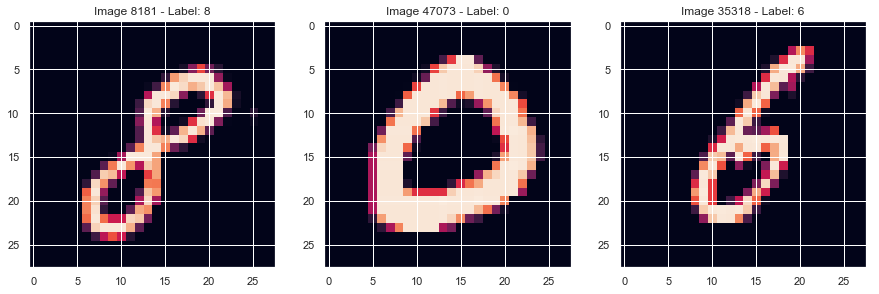

In [61]:
# Visualize some sample training imagesalong with associated classes

SAMPLE_NUM_ARRAY = rnd.permutation(np.arange(0,x_train.shape[0]))[:3]

fig,(ax0,ax1,ax2) = plt.subplots(1,3,figsize=(15,7))

ax0.imshow(x_train[SAMPLE_NUM_ARRAY[0],:,:])
ax0.title.set_text('Image {0} - Label: {1}'.format(SAMPLE_NUM_ARRAY[0],y_train[SAMPLE_NUM_ARRAY[0]]))

ax1.imshow(x_train[SAMPLE_NUM_ARRAY[1],:,:])
ax1.title.set_text('Image {0} - Label: {1}'.format(SAMPLE_NUM_ARRAY[1],y_train[SAMPLE_NUM_ARRAY[1]]))

ax2.imshow(x_train[SAMPLE_NUM_ARRAY[2],:,:])
ax2.title.set_text('Image {0} - Label: {1}'.format(SAMPLE_NUM_ARRAY[2],y_train[SAMPLE_NUM_ARRAY[2]]))

plt.show()

In [63]:
# Let's normalize the data

x_train = x_train.astype('float32').reshape(-1,28,28,1)
x_test = x_test.astype('float32').reshape(-1,28,28,1)

x_train /= 255
x_test /= 255

In [64]:
# Classes in the data

NUM_OUTPUT_CLASSES = np.unique(y_train).shape[0]

print('Number of distinct output classes: {0}'.format(NUM_OUTPUT_CLASSES))

Number of distinct output classes: 10


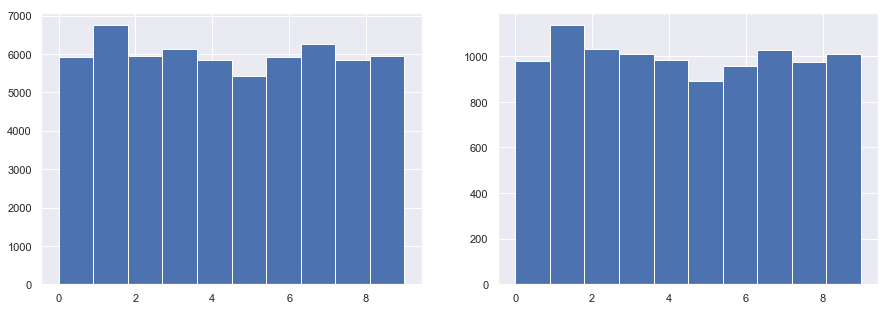

In [65]:
# Distribution of classes in training set

fig,(ax0,ax1) = plt.subplots(1,2,figsize=(15,5))

ax0.hist(y_train)
ax1.hist(y_test)

plt.show()

In [66]:
from sklearn.preprocessing import OneHotEncoder

# Make a OneHot encoder
ohe = OneHotEncoder()

# OneHot encoding of target data
y_train_ohe = ohe.fit_transform(y_train.reshape(-1,1)).todense()
y_test_ohe = ohe.transform(y_test.reshape(-1,1)).todense()

C:\Users\Jan\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [71]:
# Input layer
in0 = Input(shape=(28,28,1,))

# Layer 1
x = Conv2D(64,(2,2),activation='relu',kernel_initializer='he_uniform',padding='same')(in0)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Dropout(rate=0.15)(x)

# Layer 2
x = Conv2D(32,(2,2),activation='relu',kernel_initializer='he_uniform',padding='same')(x)
x = MaxPooling2D(pool_size=(2,2),padding='same')(x)
x = Dropout(rate=0.25)(x)

# Flatten output
x = Flatten()(x)
x = Dense(units=16,activation='relu',kernel_initializer='he_uniform')(x)

# Softmax output
out0 = Dense(units=NUM_OUTPUT_CLASSES,activation='softmax',kernel_initializer='he_uniform')(x)

In [72]:
# Create model

model = Model(inputs=in0,outputs=out0)

print('Model output shape: {0} -- Should be (None, {1}), if it is not tweak the units in the model'.format(model.output_shape,NUM_OUTPUT_CLASSES))

Model output shape: (None, 10) -- Should be (None, 10), if it is not tweak the units in the model


In [73]:
# Use Adam optimizer, Cross-Entropy loss, and MSE as metric

opt = Adam(lr=0.01)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [74]:
# Fit the model

hist = model.fit(x_train,y_train_ohe,batch_size=3,epochs=3,validation_split=0.2,shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 154s 3ms/step - loss: 0.5554 - acc: 0.8314 - val_loss: 0.2156 - val_acc: 0.9363
Epoch 2/3
48000/48000 [==============================] - 161s 3ms/step - loss: 0.4266 - acc: 0.8780 - val_loss: 0.2254 - val_acc: 0.9351
Epoch 3/3
48000/48000 [==============================] - 164s 3ms/step - loss: 0.4020 - acc: 0.8904 - val_loss: 0.1970 - val_acc: 0.9488


In [80]:
# What did we actually log here?

hist.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

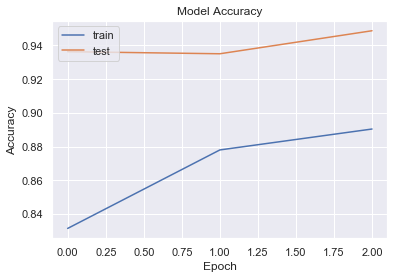

In [78]:
# Training Accuracy Plot

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

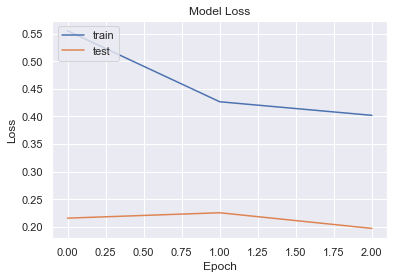

In [79]:
# Training Loss Plot

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
# Let model predict test classes

y_pred_ohe = model.predict(x_test)

In [29]:
# Extract predicted classes

y_pred = np.argmax(y_pred_ohe,axis=1)

In [30]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix and store in data frame
df = pd.DataFrame(confusion_matrix(y_true=y_test,y_pred=y_pred)).astype(int)

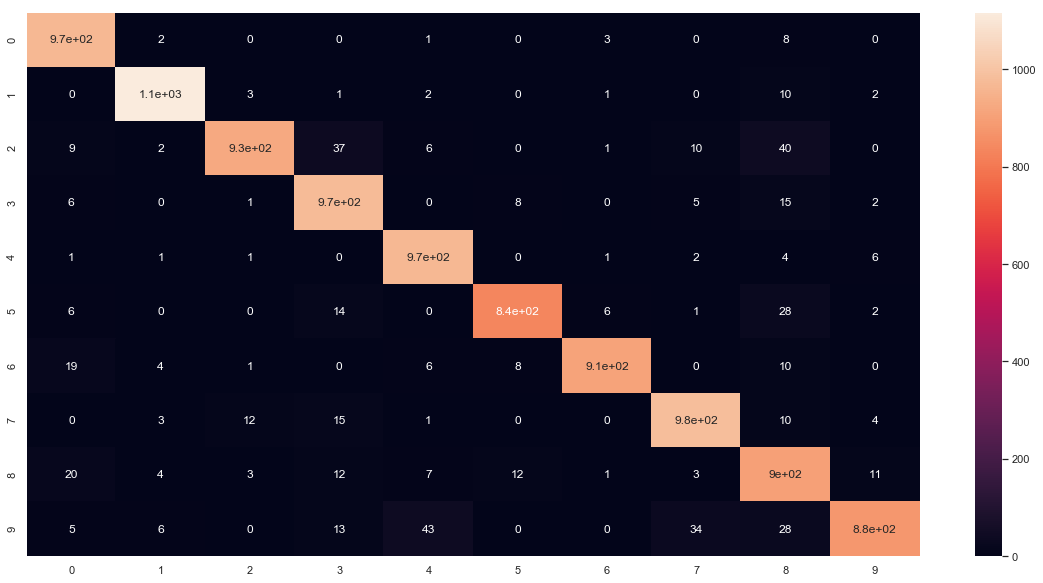

In [32]:
import seaborn as sns
sns.set()

# Plot the confusion matrix as a heathmap
fig = plt.figure(figsize=(20,10))
sns.heatmap(data=df,annot=True)

plt.show()